# Linear Regression and Correlation

## Challenge 1

You are the owner of a big company and you suspect that the younger your employees are, the most likely it is that they don't come to work. In order to prove this hypothesis, you have gathered some data:

| EmployeeID | Age | Absences |
|--------|-----|------------|
| 1      | 27  | 15         |
| 2      | 61  | 6          |
| 3      | 37  | 10         |
| 4      | 23  | 18         |
| 5      | 46  |  9         |
| 6      | 58  |  7         |
| 7      | 29  | 14         |
| 8      | 36  | 11         |
| 9      | 64  |  5         |
| 10     | 40  |  8         |

You can find this information in the `data` folder of the present repository. 

Import the necessary libraries to complete the lab here:

In [66]:
# Libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import math as mt
from scipy.stats import pearsonr

data = pd.read_csv('../data/absences.csv')

data

,Unnamed: 0,EmployeeID,Age,Absences
0,0,1,27,15
1,1,2,61,6
2,2,3,37,10
3,3,4,23,18
4,4,5,46,9
5,5,6,58,7
6,6,7,29,14
7,7,8,36,11
8,8,9,64,5
9,9,10,40,8


#### 1. Plot the scatter chart of `Age` and `Absences`. Comment the result. Do you see any relation between `Age` and `Absences`?

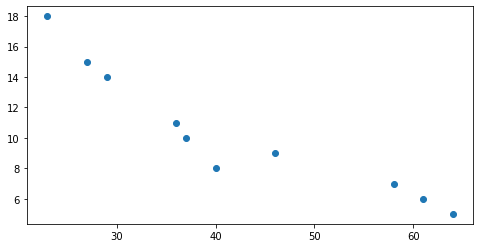

In [56]:
# your code here

age = data["Age"]
absences = data["Absences"]


Fig, ax= plt.subplots(figsize=(8,4))
plt.scatter(age,absences)

In [ ]:
# your comments here

"""

We can observe that if the age is higter, the abcense is lower


"""

#### 2.- Define a function to calculate the slope and intercept of the regression line for two variables. Your are not allowed to use any functions or methods that directly calculate those parameters.

In [3]:
mean_age = sum(age)/len(age)
mean_abs = sum(absences)/len(absences)

In [15]:
# your code here

#Slope

step1 = []
step2 = []

for x in range(len(age)):
    step1.append((age[x]-mean_age)*(absences[x]-mean_abs))
    step2.append((age[x]-mean_age)**2)


slope = sum(step1)/sum(step2)

print("slope:" , slope)

# Intercept

intercept = mean_abs - slope*mean_age

print("intercept:", intercept)


slope: -0.2681088337033404
intercept: 21.58738189891063


#### 3.- Use the function you defined in step 2 to calculate the regression line for `Age` and `Absences`. Plot it and comment your results.

In [50]:
def calculate_line_regression(x,y):
    mean_x = sum(x)/len(x)
    mean_y = sum(y)/len(y)
    
    #Slope

    step1 = []
    step2 = []

    for i in range(len(x)):
        step1.append((x[i]-mean_x)*(y[i]-mean_y))
        step2.append((x[i]-mean_x)**2)


    slope = sum(step1)/sum(step2)

    # Intercept

    intercept = mean_y - slope*mean_x

    return slope, intercept

In [51]:
calculate_line_regression(age,absences)

(-0.2681088337033404, 21.58738189891063)

<AxesSubplot:xlabel='Age', ylabel='Absences'>

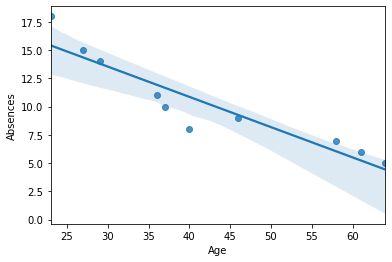

In [90]:
sns.regplot(x=age,y=absences,data=data)

In [ ]:
# your comments here

"""

We can observe the same that the first exercise. Therefore, the first variable og Age is 21 (intercept) and how the number 
of absence is lower if age increase, the slope value is negative


"""

#### 4.- Define a function to calculate the covariance and the correlation of two variables.

In [80]:
def calculate_cov_corr_auto(x,y):
    cov = np.cov(x, y)
    corr = np.corrcoef(x,y)

    return cov, corr

In [141]:
def calculate_cov_corr(x,y):
    
    mean_x = sum(x)/len(x)
    mean_y = sum(y)/len(y)

    step1 = []
    step2 = []
    step3 = []

    for i in range(len(x)):
        step1.append((x[i] - mean_x) * (y[i] - mean_y))
        step2.append((x[i] - mean_x))
        step3.append((y[i] - mean_y))
        
    step1 = np.array(step1)
    step2 = np.array(step2)
    step3 = np.array(step3)

    cov = np.sum(step1) / (len(x)-1)
    
    corr = np.sum(step2*step3) / mt.sqrt(np.sum(step2**2) * np.sum(step3**2))
    
    return cov, corr

#### 5.- Use the function you defined in step 4 to calculate the covariance and the correlation of `Age` and `Absences`. Compare them and comment.

In [142]:
calculate_cov_corr(age,absences)

(-57.699999999999996, -0.9325434092481012)

In [143]:
# your code here

calculate_cov_corr_auto(age,absences)

(array([[215.21111111, -57.7       ],
        [-57.7       ,  17.78888889]]),
 array([[ 1.        , -0.93254341],
        [-0.93254341,  1.        ]]))

In [ ]:
# your comments here

"""

The correlation is negative because if one variable (ages or absence) goes up, the other variable goes down

The covariance is the same argument but with the covariance we can see one variable with other variable change

-57.7 respect the other.


"""

#### 6.- Summarize your results, interpret them and give some insights. Can you confirm that the age is an indicator of absenteeism?

In [ ]:
# your comments here

"""

Yes, with the 2 variables (ages and absence), we can say that the old people more absenteeism.


"""

## Challenge 2

Good Ironhackers stay in campus on Fridays for Ironbeers. You suspect that the more people you tell to stay, the most likely it is that they don't. You want to know if you are the reason why people don't stay so you decide to do an analysis. 

X is the number of people that you told to stay and Y is the number of people that actually stayed.

| X | Y |
|---|---|
| 1 | 1 |
| 3 | 2 |
| 4 | 4 |
| 6 | 4 |
| 8 | 5 |
| 9 | 7 |
| 11 |8 |
| 14 | 9 |

Use the following command to create a dataframe with the data about Ironbeers attendance:

In [45]:
ironbeers_df = pd.DataFrame({'X': [1,3,4,6,8,9,11,14], 'Y': [1,2,4,4,5,7,8,9]})

#### 1.- Calculate the covariance and the correlation of `X` and `Y`. Comment on the results.

In [84]:
# your code here

calculate_cov_corr_auto(ironbeers_df["X"], ironbeers_df["Y"])



(array([[18.85714286, 12.        ],
        [12.        ,  8.        ]]),
 array([[1.        , 0.97700842],
        [0.97700842, 1.        ]]))

In [ ]:
# your comments here

"""

When i ask more people, the more people stay. We can say this because de correlation it's almost one


"""

#### 2.- Plot the scatter chart of `X` and `Y`. Comment on the results.

<AxesSubplot:xlabel='X', ylabel='Y'>

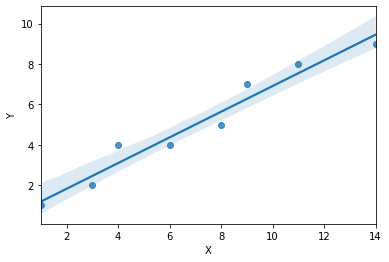

In [85]:
# your code here

sns.regplot(x=ironbeers_df["X"],y= ironbeers_df["Y"],data=ironbeers_df)


In [ ]:
# your comments here

"""

if one variable goes up, other variable goes up


"""

#### 3.- Calculate the regression line for `X` and `Y`. Commment on the results.

In [88]:
# your code here

calculate_line_regression(ironbeers_df["X"],ironbeers_df["Y"])

(0.6363636363636364, 0.5454545454545459)

In [ ]:
# your comments here

"""

We can see that this parameters are positives because when one variable goes up other variable goes up


"""

#### 4.- What is your conclusion? Are you the reason why people is not staying on Fridays?

In [ ]:
# your comments here

"""

I don't know, i think some people don't like beer


"""

## Bonus Challenge: Error Analysis

You are going to do an analysis to check whether two random variables fit into a linear regression or not.

In this challenge, you are asked to do an error analysis using the data in **challenge 2**. An "error" is the difference between the expected value of an observation (the regression line value) and the actual value.

#### 1.- First create a new column `expected_Y` in `ironbeers_df` to store the expected `Y` value for each `X`.
**Hint**: You get the expected `Y` by evaluating the regression line for each `X`.

In [ ]:
# your code here

#### 2.- Create a new column `error` in `ironbeers_df` to store the error between the actual and expected values of `Y`. Plot the scatter chart of `X` and `error`.

In [ ]:
# your code here

#### 3.- The closer the points to zero, the best the actual values fit the linear regression. Comment the plot above. Do you see any particular points with a high error?

In [ ]:
# your comments here

#### 4.- Remove the points with a high error and recalculate the regression line.

In [ ]:
# your code here

#### 5.- Calculate the correlation. What is happening? Comment the result.

In [ ]:
# your code here

In [ ]:
# your comments here